In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns

In [78]:
df = pd.read_csv('car_price.csv')

In [79]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [80]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [81]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [83]:
df.shape

(205, 26)

In [84]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<ipython-input-85-9474e52953ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Corelation between the columns')

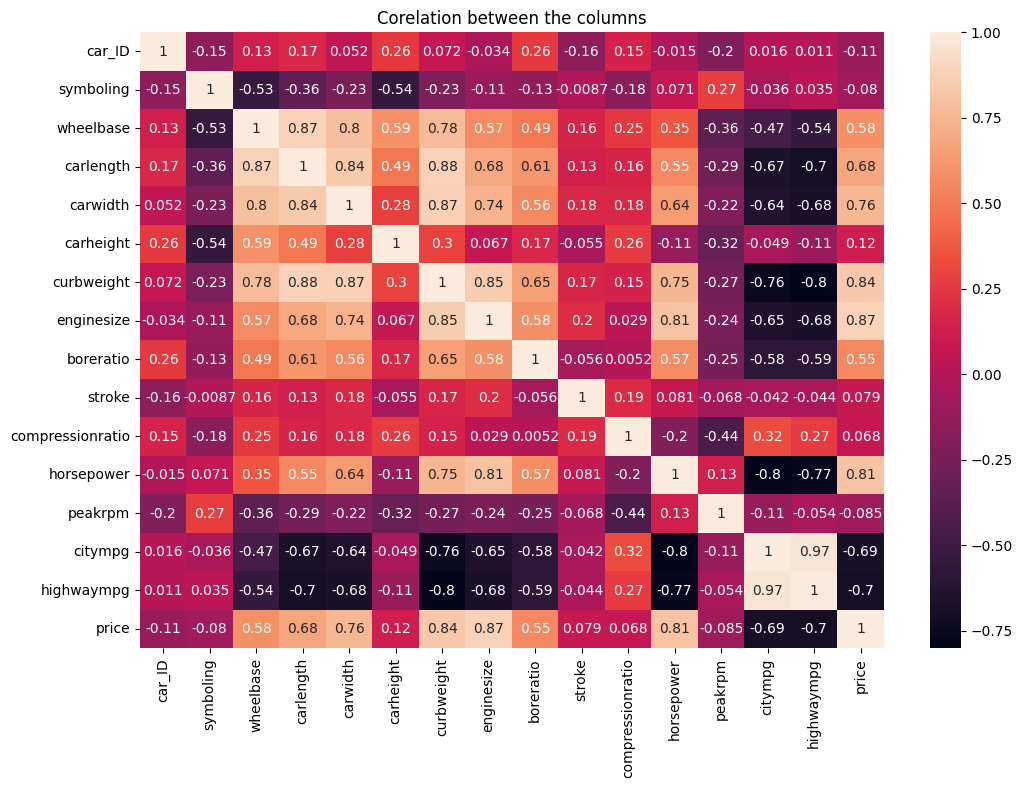

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Corelation between the columns")

In [86]:
x=df.drop(['price','CarName','fueltype','car_ID','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1)


In [87]:

y=df['price'].values
     


In [88]:

print(f"x_shape : {x.shape}\ny_shape : {y.shape}")

x_shape : (205, 14)
y_shape : (205,)


In [89]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=42)
print("X-train : ",x_train.shape)
print("X-test : ",x_test.shape)
print("y-train : ",y_train.shape)
print("y-test : ",y_test.shape)

X-train :  (143, 14)
X-test :  (62, 14)
y-train :  (143,)
y-test :  (62,)


In [90]:
regressor=LinearRegression()

In [91]:
regressor.fit(x_train,y_train)

LinearRegression()

In [92]:
regressor.coef_

array([ 3.27016490e+02,  1.36586513e+02, -7.38517319e+01,  6.84132067e+02,
        1.37449591e+02,  8.15986711e-01,  1.15357762e+02, -6.29512654e+02,
       -3.03990574e+03,  2.65996990e+02,  1.60049388e+01,  2.10012756e+00,
       -3.08382112e+02,  8.47115400e+01])

In [93]:
regressor.intercept_

-54867.34720445984

In [94]:
y_pred=regressor.predict(x_test)

In [95]:
y_pred.shape

(62,)

In [96]:
result=pd.DataFrame({'Actual':y_test,'Produced':y_pred})
     

In [97]:
print(result)

       Actual      Produced
0   30760.000  26208.153727
1   17859.167  17362.609133
2    9549.000  10091.449767
3   11850.000  14799.137112
4   28248.000  24902.620418
..        ...           ...
57  11845.000   9863.857477
58  37028.000  26025.724404
59   5389.000   5700.381470
60   9233.000  10488.984183
61  17199.000  22681.256940

[62 rows x 2 columns]


In [98]:
residual_error=abs(y_test-y_pred)
residual_error

array([ 4551.84627263,   496.55786714,   542.44976658,  2949.13711228,
        3345.37958183,  1727.93653665,   348.12047367,  2347.48088201,
        1290.63860229,  1409.33247047,  2846.97174484,  1898.91407122,
        1712.22848169,  1070.8516999 ,   138.72197183,   423.18540535,
        7935.23718995,  3227.11376931,  2106.96495366,  1280.4996632 ,
        2131.07921939,  8670.39235432,  1548.962331  ,  6005.49596544,
         333.22659209, 14929.70369367,  4145.76808884,  3327.67392034,
        2232.82070494,  3197.42258351,  1143.52555846,   111.82170026,
        1390.64727441,  2914.25382812,   674.00891457,  3876.38775059,
         210.82418158,  1081.14252305,  4214.66000757,  1436.70540691,
        2018.45570996,  5103.73914381,  3036.12605515,  1228.77789099,
        1287.35275078,   891.18136069,   111.82170026,  1978.05758483,
         911.26491708,  2739.97557892,  1294.70305228,  5270.8095533 ,
        1559.38913907,   412.55008451,  1593.42853218,   951.89400516,
      

In [99]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [100]:
pred = model.predict(x_test)
     

In [101]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MSE : ",(metrics.mean_squared_error(pred,y_test)))
print("MAE : ",(metrics.mean_absolute_error(pred,y_test)))
print("R2 Score : ",(metrics.r2_score(pred,y_test)))

MSE :  13839918.973460436
MAE :  2596.5756600288823
R2 Score :  0.7662820509923028


In [103]:
pred2 = model.predict([[236,98.6,168.8,44.1,88.8,2548,130,3.47,2.68,9,11.1,5000,21,27]])
pred2.round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81313.29])

In [104]:
sum(residual_error)/len(residual_error)

2596.5756600288823

In [105]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)
     

2596.5756600288823

In [106]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.220457831477204

In [120]:
r1=regressor.score(x_test,y_test)
r1

0.8002447412986148

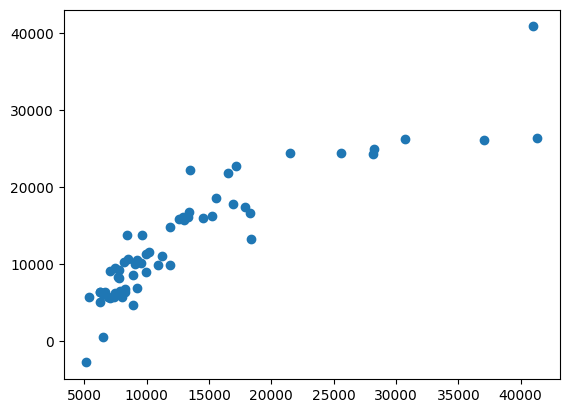

In [111]:
plt.scatter(y_test,y_pred)
plt.show()

Text(0.5, 1.0, 'Actual vs. Predicted Values with Line of Best Fit')

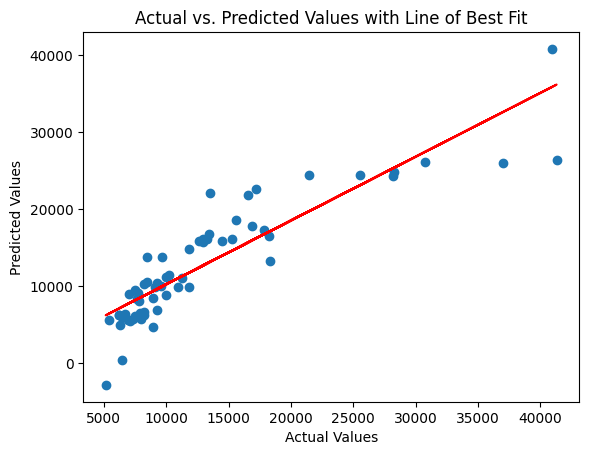

In [116]:
plt.scatter(y_test, y_pred)


coef = np.polyfit(y_test, y_pred, 1)
poly1d_fn = np.poly1d(coef)


plt.plot(y_test, poly1d_fn(y_test), color='r')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Line of Best Fit')

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
     

In [117]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [118]:
train_pred = knn.predict(x_train)
     

test_pred = knn.predict(x_test)
     

print(train_pred,test_pred)

[12283.4 14507.2 10546.2  7020.6 15613.2  7020.6 18789.6 11173.   7314.
 18789.6  8693.8  6435.  17437.  11084.2 13088.  14336.8  6546.2  8412.2
  6546.2 18789.6 18178.  20017.  14336.8  6546.2 13221.4  9139.8 22315.2
  8645.   6666.   7020.6 18737.   9788.6  5821.8 13600.  13160.6  7020.6
 13088.  17441.8  7695.6 18789.6  8412.2 22315.2 18178.   7695.6 18789.6
  6367.3 17437.   8693.8 15668.   9788.6 13088.   9788.6  6263.8  6296.
 11095.8 11426.4  8111.8  8718.8 28423.8 15610.4  9788.6  6567.9 11084.2
 11426.4 13088.  17330.  11426.4  8412.2 15489.4 10094.6  8223.4 12078.
 13943.8 34608.   6738.2  8693.8  8893.   8733.8 10705.6 16607.4  6435.
 12612.6  8718.8  7471.6  9617.4 34608.  10492.4  7020.6 17616.  17330.
  6618.2 14507.2 16607.4  8701.8  6298.2 20017.  18346.6  9788.6 11698.8
 10105.4 23365.7 36488.  16607.4 12612.6 11095.8 15753.4 10199.2  6435.
 15664.4  6435.  17536.4 10428.  15118.  34608.  10492.4  5821.8 14588.
  7471.6 18203.  26586.1 12078.   7471.6 10951.4 11426.4  

In [119]:
r2 = r2_score(y_test,test_pred)
r2

0.7708072822708366

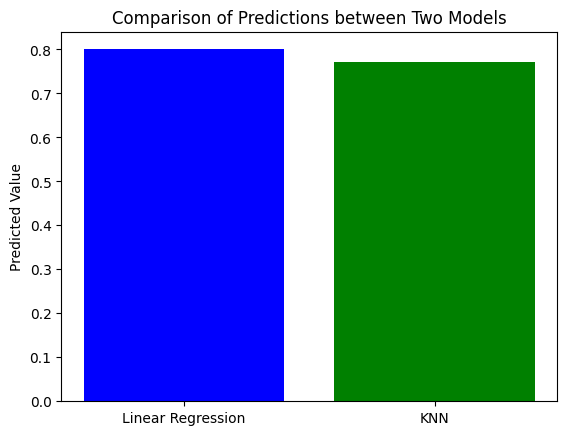

In [121]:
models = ['Linear Regression', 'KNN']
y_preds = [r1,r2]

plt.bar(models, y_preds, color=['blue', 'green'])
plt.ylabel('Predicted Value')
plt.title('Comparison of Predictions between Two Models')
plt.show()